# EXPERIMENT 7

### SHIVAM SINGHAL 2K18/CO/340

**AIM:** Build an Artificial Neural Network by implementing the Backpropagation algorithm and test the same using appropriate data sets.

In [1]:
import pandas as pd 
import numpy as np

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
header = ['sepal length in cm' , 'sepal width in cm' , 'petal length in cm' , 'petal width in cm' , 'class']
df = pd.read_csv(url , names = header)
df = df.replace(df['class'].unique() , [0,1,2])

In [3]:
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
X = np.array(df)[: , 0:4]
Y = np.array(df)[: , 4]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    shuffle=True, stratify=Y,
                                                    test_size=0.3, random_state=2)

from sklearn import preprocessing
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)

from sklearn.preprocessing import OneHotEncoder
y_train_without_one_hot = y_train
one_hot = OneHotEncoder(sparse = False)
y_train = y_train.reshape(-1,1)
y_train = np.array(one_hot.fit(y_train).transform(y_train))

print(X_train.shape , y_train.shape)

(105, 4) (105, 3)


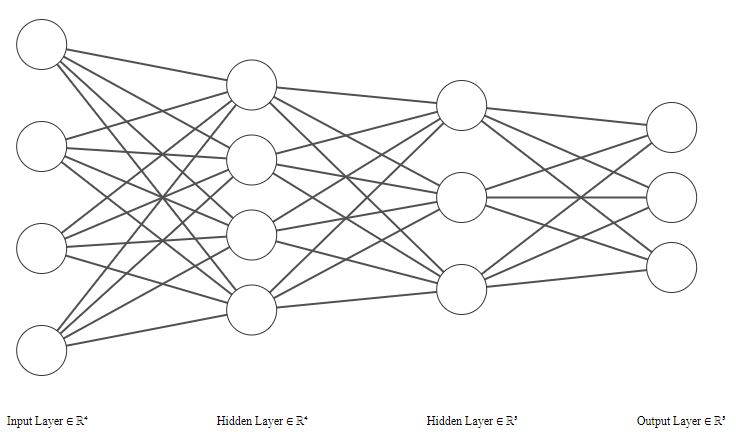

In [5]:
from IPython.display import Image
Image('NN_architechture.JPG') 

In [6]:
input_size = 4 
layers = [4,3]
output_size = 3
EPOCHS=50

In [7]:
def softmax(a):
    ea = np.exp(a)
    return ea/np.sum(ea,axis=1,keepdims=True)

In [8]:
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model = {}
        model['W1'] = np.random.randn(input_size,layers[0]) 
        model['b1'] = np.zeros((1,layers[0]))
        
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        
    def forward(self,x):

        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,W2) + b2 
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        #Store the outputs of each layer for back-propagation
        self.activation_outputs = (a1,a2,y_)
        
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        
        dw3 = np.dot(a2.T,delta3) #)h2+1,C) => (h2+1,m) X (m,C) 
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)  #(m,h2+1) => (m,h2+1) *(m,C X C,h2+1)
        dw2 = np.dot(a1.T,delta2)  
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T) 
        dw1 = np.dot(x.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        self.model['W1'] -= learning_rate*dw1
        self.model['W2'] -= learning_rate*dw2
        self.model['W3'] -= learning_rate*dw3
        
        self.model['b1'] -= learning_rate*db1
        self.model['b2'] -= learning_rate*db2
        self.model['b3'] -= learning_rate*db3
        
        
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)

In [9]:
def loss(p,y):
    l = -1*np.mean(np.multiply(y ,np.log(p)) + np.multiply((1-y),np.log(1-p)))
    return l

In [10]:
model = NeuralNetwork(input_size=input_size,layers = layers,output_size= output_size)

In [11]:
from sklearn.preprocessing import OneHotEncoder
def train(X,Y,model,epochs,logs=True):
    """Creates and Model and Trains it!"""
    
    training_loss = []
    val_loss = []
    val_acc = []
    
    for ix in range(epochs):
        Y_ = model.forward(X)
        l = loss(Y_,Y)
        model.backward(X,Y)
        if(logs and ix%500==0):
            print("Epoch %d Loss %.4f"%(ix,l),end='\n')

In [12]:
train(X_train,y_train,model,5000)

Epoch 0 Loss 0.7769
Epoch 500 Loss 0.1880
Epoch 1000 Loss 0.1130
Epoch 1500 Loss 0.0839
Epoch 2000 Loss 0.0729
Epoch 2500 Loss 0.0677
Epoch 3000 Loss 0.0646
Epoch 3500 Loss 0.0627
Epoch 4000 Loss 0.0614
Epoch 4500 Loss 0.0605


In [13]:
model.summary()

W1  (4, 4)
A1  (105, 4)
W2  (4, 3)
A2  (105, 3)
W3  (3, 3)
Y_  (105, 3)


In [14]:
outputs = model.predict(X_train)
training_accuracy = np.sum(outputs==y_train_without_one_hot)/y_train_without_one_hot.shape[0]
print("Training Accuracy %.4f"%(training_accuracy*100))

Training Accuracy 96.1905


In [15]:
outputs = model.predict(X_test)
testing_accuracy = np.sum(outputs==y_test)/y_test.shape[0]
print("Testing Accuracy %.4f"%(testing_accuracy*100))

Testing Accuracy 97.7778
